In [1]:
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langchain_community.tools import TavilySearchResults
from typing import TypedDict, Annotated
from langgraph.graph import add_messages, StateGraph, END
from dotenv import load_dotenv
from langgraph.prebuilt import ToolNode

load_dotenv()

True

In [2]:
class AgentState(TypedDict):
    messages: Annotated[list, add_messages]

search_tool = TavilySearchResults(max_results=2)
tools = [search_tool]

llm = ChatGroq(model="llama-3.1-8b-instant")
llm_with_tools = llm.bind_tools(tools=tools)

def model(state: AgentState):
    return {
        "messages": [llm_with_tools.invoke(state["messages"])],
    }

def tools_router(state: AgentState):
    last_message = state["messages"][-1]

    if(hasattr(last_message, "tool_calls") and len(last_message.tool_calls) > 0):
        return "tool_node"
    else:
        return END


tool_node = ToolNode(tools=tools)

graph = StateGraph(AgentState)

graph.add_node("model", model)
graph.add_node("tool_node", tool_node)
graph.set_entry_point("model")

graph.add_conditional_edges("model", tools_router)
graph.add_edge("tool_node", "model")

app = graph.compile()

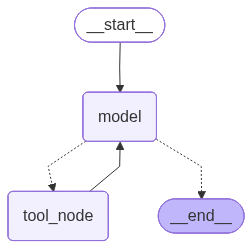

In [3]:
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API
        )
    )
)

In [4]:

input = {
    "messages": ["What's the IMDB ratings of stranger things from season 1 -5?"]
}

events = app.stream(input=input, stream_mode="values")

for event in events:
    print(event["messages"])

[HumanMessage(content="What's the IMDB ratings of stranger things from season 1 -5?", additional_kwargs={}, response_metadata={}, id='f3937605-2747-446e-b785-698a1cb613da')]
[HumanMessage(content="What's the IMDB ratings of stranger things from season 1 -5?", additional_kwargs={}, response_metadata={}, id='f3937605-2747-446e-b785-698a1cb613da'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'wq7kry78f', 'function': {'arguments': '{"query":"IMDB ratings Stranger Things seasons 1-5"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 294, 'total_tokens': 321, 'completion_time': 0.045458624, 'prompt_time': 0.017396227, 'queue_time': 0.049135902, 'total_time': 0.062854851}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-0bf64326-03b8-47d2-a016-0f24421413bf-0', tool_calls=[{'name': 'tavily_search_re

In [5]:
input = {
    "messages": ["What's the IMDB ratings of stranger things from season 1 -5?"]
}

events = app.stream(input=input, stream_mode="updates")

for event in events:
    print(event)

{'model': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '3ptcfcs7c', 'function': {'arguments': '{"query":"IMDB ratings of stranger things seasons 1-5"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 294, 'total_tokens': 322, 'completion_time': 0.044885833, 'prompt_time': 0.017537282, 'queue_time': 0.050033428, 'total_time': 0.062423115}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-9c42424f-d5e6-4e4b-90af-87a281156a4c-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'IMDB ratings of stranger things seasons 1-5'}, 'id': '3ptcfcs7c', 'type': 'tool_call'}], usage_metadata={'input_tokens': 294, 'output_tokens': 28, 'total_tokens': 322})]}}
{'tool_node': {'messages': [ToolMessage(content='[{"url": "https://www.imdb.com/title/tt4574334/ratings/", "content":

In [6]:
input = {
    "messages": ["Hi, how are you?"]
}

events = app.astream_events(input=input, version="v2")

async for event in events:
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi, how are you?']}}, 'name': 'LangGraph', 'tags': [], 'run_id': '758dc56c-2067-44e1-9ef3-48d9947da330', 'metadata': {}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi, how are you?']}}, 'name': '__start__', 'tags': ['graph:step:0', 'langsmith:hidden'], 'run_id': '60d6ff56-5906-43e6-808e-517f65b92bf4', 'metadata': {'langgraph_step': 0, 'langgraph_node': '__start__', 'langgraph_triggers': ('__start__',), 'langgraph_path': ('__pregel_pull', '__start__'), 'langgraph_checkpoint_ns': '__start__:ece501b5-6142-1013-3081-ba0e06fed5ee'}, 'parent_ids': ['758dc56c-2067-44e1-9ef3-48d9947da330']}
{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi, how are you?']}}, 'name': '_write', 'tags': ['seq:step:1', 'langsmith:hidden', 'langsmith:hidden'], 'run_id': '11242856-0b4a-49af-95b4-857af87f295d', 'metadata': {'langgraph_step': 0, 'langgraph_node': '__start__', 'langgraph_triggers': ('__start__

In [9]:
input = {
    "messages": ["Hi, how are you?"]
}

events = app.astream_events(input=input, version="v2")

async for event in events:
    if event["event"] == "on_chat_model_stream":
        print(event["data"]["chunk"].content, end="", flush=True)

I'm functioning properly, thanks for asking. What can I assist you with?